## Задание 1
Завершаем практическое задание №2. Необходимо для каждой распознанной фамилии вывести на экран наиболее подходящий вариант из стартового протокола

In [1]:
import numpy as np
import Levenshtein
import pandas as pd

In [2]:
# что было написано в заявке
claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

In [3]:
# результат расшифровки речи диктора
speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

### Levenshtein

In [4]:
# проверим Levenshtein.distance для каждого имени из claim_list
for recognized_name in speech_recognition:
    for real_name in claim_list:
        print('{} -> {} = {}'.format(recognized_name, real_name, Levenshtein.distance(recognized_name, real_name)))

кучменко она -> Шехавцова Анна = 11
кучменко она -> Гречихина Наталья = 14
кучменко она -> Козлова Алена = 11
кучменко она -> Груздева Алина = 10
кучменко она -> Кущенко Анна = 5
кучменко она -> Чистякова Анастасия = 15
кущенко оксана -> Шехавцова Анна = 11
кущенко оксана -> Гречихина Наталья = 15
кущенко оксана -> Козлова Алена = 11
кущенко оксана -> Груздева Алина = 11
кущенко оксана -> Кущенко Анна = 5
кущенко оксана -> Чистякова Анастасия = 14
груздь алина -> Шехавцова Анна = 11
груздь алина -> Гречихина Наталья = 14
груздь алина -> Козлова Алена = 9
груздь алина -> Груздева Алина = 5
груздь алина -> Кущенко Анна = 10
груздь алина -> Чистякова Анастасия = 16
рычихина наталья -> Шехавцова Анна = 14
рычихина наталья -> Гречихина Наталья = 3
рычихина наталья -> Козлова Алена = 14
рычихина наталья -> Груздева Алина = 14
рычихина наталья -> Кущенко Анна = 14
рычихина наталья -> Чистякова Анастасия = 12
шиховцева на -> Шехавцова Анна = 6
шиховцева на -> Гречихина Наталья = 14
шиховцева н

In [5]:
# создадим список словарей, где ключ - имя из claim_list, значение - Levenshtein.distance
dist = []
for recognized_name in speech_recognition:
    distances_list = {real_name: Levenshtein.distance(recognized_name, real_name) for real_name in claim_list}
    dist.append(distances_list)
    print(distances_list)   

{'Шехавцова Анна': 11, 'Гречихина Наталья': 14, 'Козлова Алена': 11, 'Груздева Алина': 10, 'Кущенко Анна': 5, 'Чистякова Анастасия': 15}
{'Шехавцова Анна': 11, 'Гречихина Наталья': 15, 'Козлова Алена': 11, 'Груздева Алина': 11, 'Кущенко Анна': 5, 'Чистякова Анастасия': 14}
{'Шехавцова Анна': 11, 'Гречихина Наталья': 14, 'Козлова Алена': 9, 'Груздева Алина': 5, 'Кущенко Анна': 10, 'Чистякова Анастасия': 16}
{'Шехавцова Анна': 14, 'Гречихина Наталья': 3, 'Козлова Алена': 14, 'Груздева Алина': 14, 'Кущенко Анна': 14, 'Чистякова Анастасия': 12}
{'Шехавцова Анна': 6, 'Гречихина Наталья': 14, 'Козлова Алена': 9, 'Груздева Алина': 9, 'Кущенко Анна': 10, 'Чистякова Анастасия': 13}
{'Шехавцова Анна': 13, 'Гречихина Наталья': 12, 'Козлова Алена': 12, 'Груздева Алина': 14, 'Кущенко Анна': 14, 'Чистякова Анастасия': 4}


In [6]:
for i in range(0,len(speech_recognition)):
    print('{} - наиболее подходящий вариант для   {}'.format\
          (sorted(dist[i].items(),key = lambda x: x[1])[0],speech_recognition[i]))

('Кущенко Анна', 5) - наиболее подходящий вариант для   кучменко она
('Кущенко Анна', 5) - наиболее подходящий вариант для   кущенко оксана
('Груздева Алина', 5) - наиболее подходящий вариант для   груздь алина
('Гречихина Наталья', 3) - наиболее подходящий вариант для   рычихина наталья
('Шехавцова Анна', 6) - наиболее подходящий вариант для   шиховцева на
('Чистякова Анастасия', 4) - наиболее подходящий вариант для   чистова анастасия


## Задание 2
Постройте модель kNN для распознавания цифр. Посчитайте получившееся значение точности (последняя строка в файле 7. kNN digits.ipynb)

In [7]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
digits = datasets.load_digits()

Нарисуем пример цифры

<Figure size 432x288 with 0 Axes>

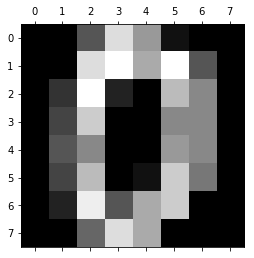

In [9]:
plt.gray()
for i in range(0, 1):
    plt.matshow(digits.images[i])
    
plt.show() 

Признаки и целевая переменная

In [10]:
X_digits = digits.data
Y_digits = digits.target

Количество цифр в данных

In [11]:
n_samples = len( X_digits )

Разобьем данные на обучающую выборку и тест в пропорции 90 / 10

In [12]:
split = int( n_samples * .9 )
split

1617

In [13]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]

Формируем тестовую выборку и обучаем модель knn

In [14]:
x_val = X_digits[split:]
y_val = Y_digits[split:]

In [15]:
# по умолчанию
model = KNeighborsClassifier()

In [16]:
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
model.score(x_val,y_val)

0.9611111111111111

посмотрим на результат в зависимости от параметра n_neighbors

In [18]:
for i in range(1,25,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    scores = {model.score(x_val,y_val):i}
    print(sorted(scores.items(),key=lambda x: x[1]))

[(0.9666666666666667, 1)]
[(0.9666666666666667, 3)]
[(0.9611111111111111, 5)]
[(0.9611111111111111, 7)]
[(0.9611111111111111, 9)]
[(0.9611111111111111, 11)]
[(0.9611111111111111, 13)]
[(0.9555555555555556, 15)]
[(0.9555555555555556, 17)]
[(0.9555555555555556, 19)]
[(0.9555555555555556, 21)]
[(0.9555555555555556, 23)]


Обучим с тремя соседями

In [19]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
model.score(x_val,y_val)

0.9666666666666667

посмотрим на качество в зависимости от параметра n_neighbors на графике

In [21]:
scores = []
for i in range(1,100,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    scores.append(model.score(x_val,y_val))

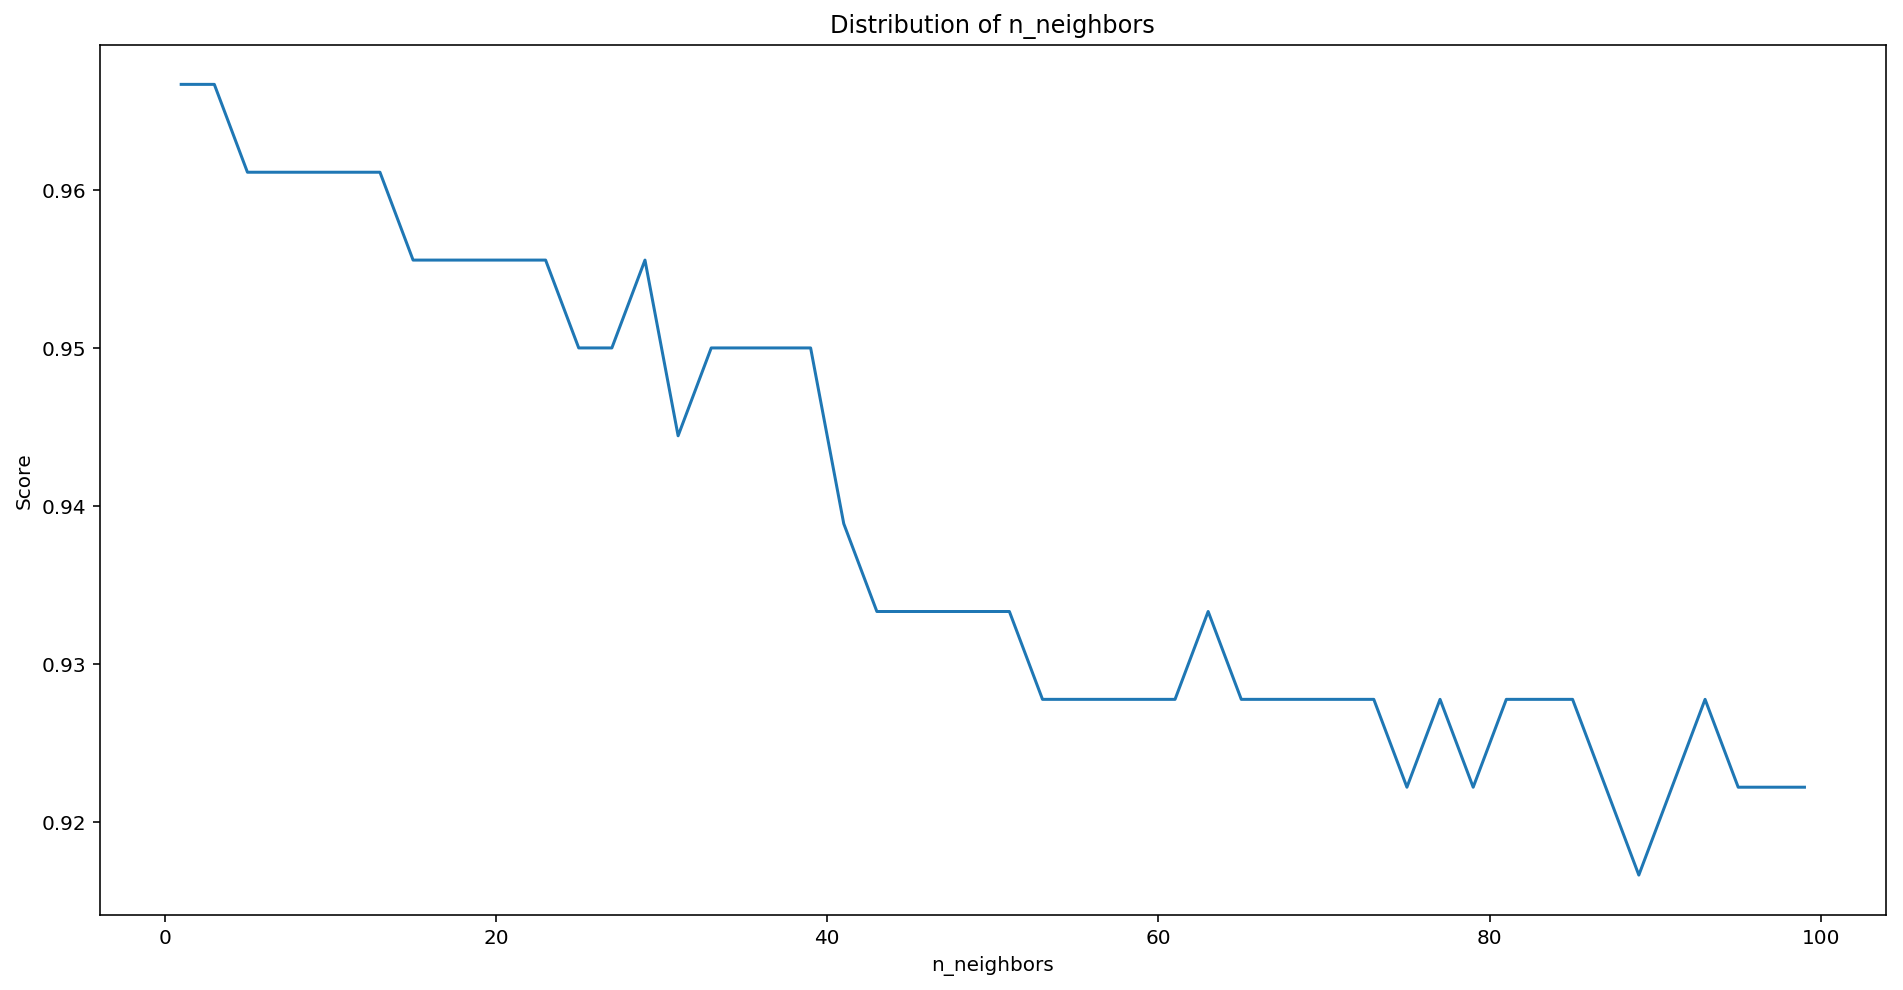

In [23]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(16,8))
plt.plot(list(range(1,100,2)),scores)
plt.ylabel('Score')
plt.xlabel('n_neighbors')
plt.title('Distribution of n_neighbors')
plt.show()